# Hierarchical Clustering

Start by loading data and preprocessing data. For the motivation behind the feature selection, refer to the notebook in the K-means task.

## Preprocessing

In [2]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load data
df = pd.read_csv('Mall_Customers.csv',index_col=0)

# Select useful features
X = df[['Annual Income (k$)','Spending Score (1-100)']].values.reshape(-1,2)  

print('Data size:')
print(X.shape)

# Select K
K = 5

Data size:
(200, 2)


## Clustering

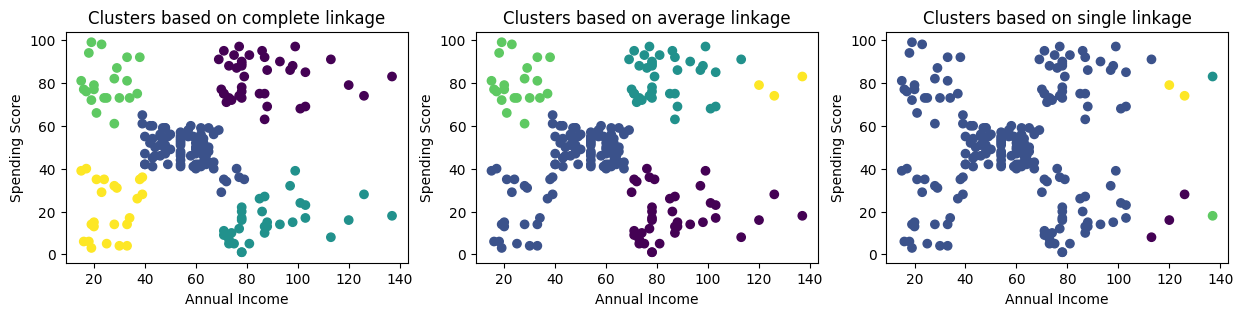

In [3]:
plt.figure(figsize=[15,3])

linkage_types = ['complete', 'average', 'single']

for i, l in enumerate(linkage_types):
  plt.subplot(1, 3, i+1)
  
  # cluster = AgglomerativeClustering(n_clusters=K, affinity='euclidean', linkage=l)
  cluster = AgglomerativeClustering(n_clusters=K, linkage=l)
  cluster.fit_predict(X)

  ax = plt.scatter(X[:,0], X[:,1], c=cluster.labels_)
  
  plt.title('Clusters based on {} linkage'.format(l))
  plt.xlabel('Annual Income')
  plt.ylabel('Spending Score')
 
L = 'complete'

## Visualisation

We are going to visualise the dendogram based on complete linkage to choose a value for K. Scikit-learn has a dendrogram method which takes the value returned by the linkage method of the same class. The linkage method takes the dataset and the method to minimise distances as parameters. The vertical height of lines corresponds to the euclidean distance between clusters.

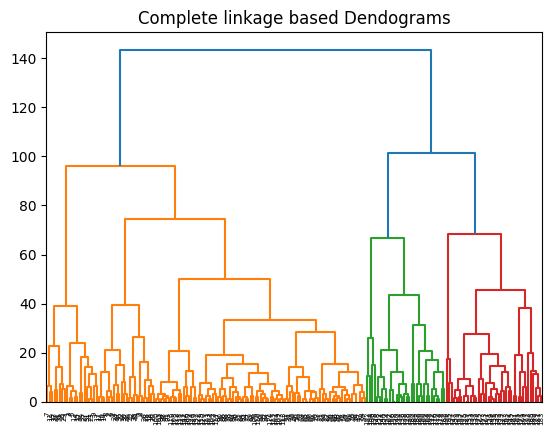

In [4]:
plt.title("Complete linkage based Dendograms")  
dend = dendrogram(linkage(X, method='complete'))  

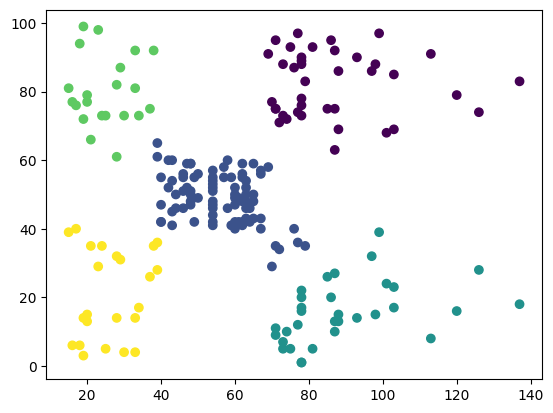

In [7]:
# cluster = AgglomerativeClustering(n_clusters=K, affinity='euclidean', linkage=L)
cluster = AgglomerativeClustering(n_clusters=K, linkage=L)
cluster.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=cluster.labels_)

## Interpretation

The data points in the bottom right belong to the customers with high salaries but low spending. These are the customers that spend their money carefully. The customers at top right have high salaries and spend a lot. These are the type of customers that companies target. Both groups have a long tail, showing the presence of a small group of very high-income shoppers.

The customers in the middle are the ones with average income and average spending. The density of this clusters shows that this cluster contains the most companies. For this reason, companies also target these customers.